# Genetic Linear Regression with Numpy
A solution... via evolution!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sample_num = 10
beta_true = [3, 5]
x_obs = np.random.normal(5, 3, sample_num)
y_obs = beta_true[0] + beta_true[1]*x_obs + np.random.normal(x_obs, 2, sample_num)

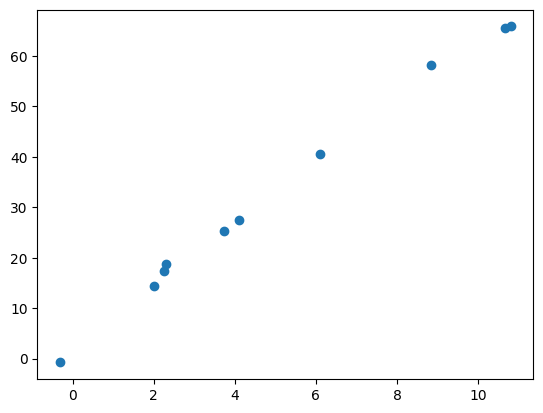

In [3]:
plt.scatter(x_obs, y_obs);

In [12]:
def rmse_fitness(beta):
    y_hat = beta[0] + x_obs*beta[1]
    rmse = np.sqrt(np.mean((y_hat - y_obs)**2))
    return rmse

In [5]:
beta = np.random.normal(-10,10, 2)
beta

array([-15.9001217 , -10.50927437])

In [13]:
rmse_fitness([  18.54413807,   3.36654949])

np.float64(9.96237508349645)

In [14]:
gen_size = 10
betas = np.random.normal(0, 10, (gen_size, 2))
betas

array([[ 13.18255531,  -9.33972927],
       [-27.82290296,   4.54337153],
       [  1.67191039, -28.55610111],
       [-15.373333  ,  12.4344489 ],
       [ -5.97760471,   3.6446843 ],
       [ -9.20862282,  -4.18436938],
       [  8.31491208,   5.85232872],
       [-14.37146795,  -7.61458371],
       [ 11.66584995,   9.57222509],
       [  7.38830336,  -1.78566355]])

In [19]:
def rank(betas, rmse_fitness):
    scored = np.column_stack((betas, np.apply_along_axis(rmse_fitness, axis=1, arr=betas))) 
    ranked = scored[scored[:, 2].argsort()]
    return ranked

In [20]:
ranked = rank(betas, rmse_fitness)
ranked

array([[  8.31491208,   5.85232872,   4.83737506],
       [ -5.97760471,   3.6446843 ,  22.57219731],
       [-15.373333  ,  12.4344489 ,  27.79158191],
       [ 11.66584995,   9.57222509,  29.90660376],
       [-27.82290296,   4.54337153,  38.52736117],
       [  7.38830336,  -1.78566355,  45.14511196],
       [ -9.20862282,  -4.18436938,  73.83137327],
       [ 13.18255531,  -9.33972927,  87.83824457],
       [-14.37146795,  -7.61458371,  99.62964771],
       [  1.67191039, -28.55610111, 217.12778879]])

In [21]:
def select(ranked, frac):
    top_num = int(frac*ranked.shape[0])
    survivors = ranked[:top_num]
    return survivors

In [22]:
survivors = select(ranked, 0.2)
survivors

array([[ 8.31491208,  5.85232872,  4.83737506],
       [-5.97760471,  3.6446843 , 22.57219731]])

In [24]:
sampling_weights = np.linspace(1, 0, survivors.shape[0])
sampling_weights /= sampling_weights.sum()
sampling_weights

array([1., 0.])

In [173]:
np.random.normal(survivors[0,0], 3, 5)

array([-3.65833812,  4.59164743, -4.32214465,  1.15297178, -3.40671887])

In [25]:
def mate(survivors, gen_size):    
    rank_weighting = np.linspace(1, 0, survivors.shape[0])
    rank_weighting /= rank_weighting.sum()

    sampled_b0 = np.random.choice(survivors[:,0], size=gen_size, replace=True, p=rank_weighting)
    sampled_b1 = np.random.choice(survivors[:,1], size=gen_size, replace=True, p=rank_weighting)
    sampled_betas = np.column_stack((sampled_b0, sampled_b1))

    # mutation
    mutation = np.random.normal(0, 1, (gen_size, 2))
    
    # next generation
    new_betas = sampled_betas + mutation

    return new_betas

In [35]:
gen_size = 100
betas = np.random.uniform(-1, 1, (gen_size, 2))
best_fit = []
verbose = True
for gen in range(10):
    if verbose:
        print(f"Generation: {gen}")
    
    # ranking
    ranked = rank(betas, get_fitness)
    best_fit.append(ranked[0][2])
    
    # selection
    survivors = select(ranked, 0.2)
    
    if verbose:
        print(f"survivors:\n {survivors}")
    
    # crossover and mutation -> next generation
    betas = mate(survivors, gen_size)

    if verbose:
        print(f"next betas: \n {betas[:10]}")
        print('\n')

# print(betas[:10])


Generation: 0
survivors:
 [[-0.29460078  0.9641859  34.14488724]
 [ 0.85018603  0.80006513 34.21366985]
 [ 0.8314715   0.79700162 34.24832305]
 [-0.3867321   0.93355233 34.41343941]
 [ 0.82263704  0.74554807 34.57697628]
 [-0.13571669  0.82627887 34.8720418 ]
 [ 0.16516909  0.78469581 34.87980945]
 [-0.76791778  0.86997937 35.13104205]
 [ 0.3165493   0.72230807 35.14293747]
 [ 0.52062865  0.67563987 35.26436631]
 [-0.05762104  0.75003569 35.28244764]
 [-0.10239177  0.71060689 35.56601141]
 [ 0.14081716  0.67508835 35.58435112]
 [ 0.45650918  0.60830998 35.73812504]
 [ 0.55971377  0.57405038 35.8662367 ]
 [ 0.85486797  0.52019832 35.95768417]
 [-0.71553262  0.72589031 35.98559806]
 [ 0.223436    0.58172234 36.0982799 ]
 [ 0.72236001  0.51523422 36.09851659]
 [-0.09140706  0.6075738  36.19989351]]
next betas: 
 [[-1.73167004  1.32012238]
 [-1.10128081  1.41480438]
 [ 0.57553829  0.08751274]
 [-0.6060618   2.14420019]
 [ 2.08649452  0.83188135]
 [-0.00908599 -1.20392221]
 [ 0.46748413  1.

In [36]:
best_fit

[np.float64(34.144887241462804),
 np.float64(22.818358679617138),
 np.float64(13.00841513311719),
 np.float64(5.580108370060595),
 np.float64(1.4685237539056335),
 np.float64(1.497050241453628),
 np.float64(1.4519039867919323),
 np.float64(1.4624183455424475),
 np.float64(1.4285711359873525),
 np.float64(1.4210710942016076)]